# Roadmap

The goal of this notebook is to provide an example of how to plot rain rate and cloud-to-ground lightning flashes.

  1. Read in volume scan data
  2. Calculate KDP
  3. Read in lightning data
  4. Plot recent lightning strikes over various radar fields

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pyart
import matplotlib.pyplot as plt
from pyart_radar_tools import *

%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119 


In [2]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

## Read in volume scan data

In [5]:
radar0 = pyart.io.read("data/KICX20150914_221837_V06.gz")
radar1 = pyart.io.read("data/KICX20150914_222306_V06.gz")

radar0 = get_kdp(radar0)
radar1 = get_kdp(radar1)

radar0.fields.keys()

['differential_phase',
 'cross_correlation_ratio',
 'spectrum_width',
 'reflectivity',
 'differential_reflectivity',
 'velocity',
 'kdp']

## Read in lightning data

In [6]:
ds = xr.open_dataset("data/2015_09_14.nc")

## Make plots

In [7]:
min_lat=36.85
max_lat=37.06
min_lon=-113.2
max_lon=-112.8
extents = dict(min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon)

In [3]:
def plot_base_scan(radar, sweep, field, ax, cbar=False, title='time', **kwargs):
    sweep_time = get_end_sweep_time(radar, sweep)

    ds0 = ds.where((ds.cloud_ground == b'G') &
                   ((sweep_time-pd.Timedelta(minutes=1)).asm8<ds.time) &
                   (ds.time<(sweep_time+pd.Timedelta(minutes=1)).asm8) &
                   (min_lat<ds.lat) & (ds.lat<max_lat) &
                   (min_lon<ds.lon) & (ds.lon<max_lon)
                  ).dropna('record')
    extents.update(kwargs)
    if title=='time':
        title=sweep_time.round('s')
    elif title=='field':
        title=field
    display_map = pyart.graph.RadarMapDisplay(radar)
    display_map.plot_ppi_map(field, sweep, title=title, colorbar_flag=False,
                             ax=ax, resolution='l', **extents)
    display_map.plot_point(ds0.lon.values, ds0.lat.values, symbol='w+', ms=10, mew=2)
    if cbar:
        fig.colorbar(display_map.plots[-1], ax=ax)

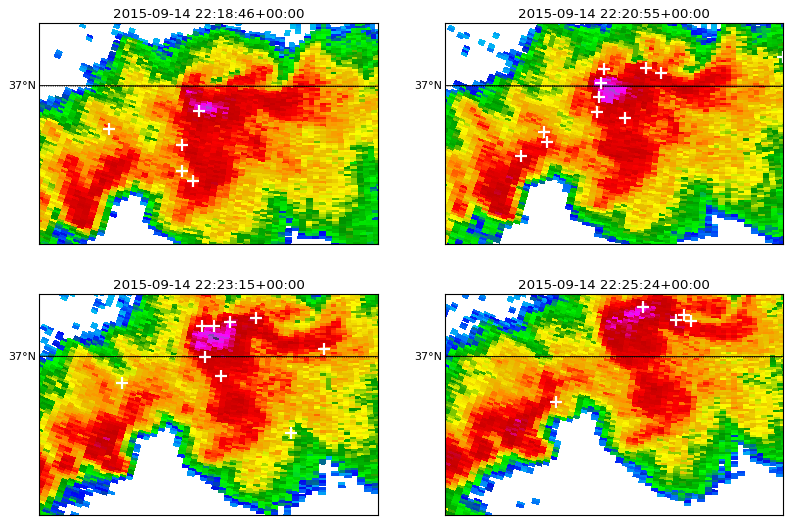

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    
plot_base_scan(radar0, 0, 'reflectivity', axes[0,0], vmin=-8, vmax=75)
plot_base_scan(radar0, 8, 'reflectivity', axes[0,1], vmin=-8, vmax=75)
plot_base_scan(radar1, 0, 'reflectivity', axes[1,0], vmin=-8, vmax=75)
plot_base_scan(radar1, 8, 'reflectivity', axes[1,1], vmin=-8, vmax=75)

plt.show()

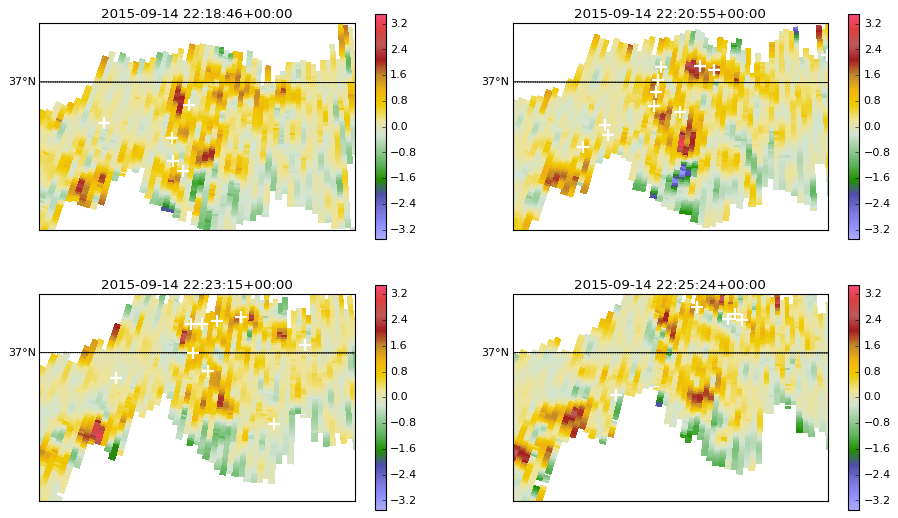

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

plot_base_scan(radar0, 0, 'kdp', axes[0,0], cmap='pyart_Theodore16', vmin=-3.5, vmax=3.5, cbar=True)
plot_base_scan(radar0, 8, 'kdp', axes[0,1], cmap='pyart_Theodore16', cbar=True)
plot_base_scan(radar1, 0, 'kdp', axes[1,0], cmap='pyart_Theodore16', cbar=True)
plot_base_scan(radar1, 8, 'kdp', axes[1,1], cmap='pyart_Theodore16', cbar=True)

plt.show()

In [12]:
min_lat=36.95
max_lat=37.06
min_lon=-113.1
max_lon=-112.9
extents = dict(min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon)

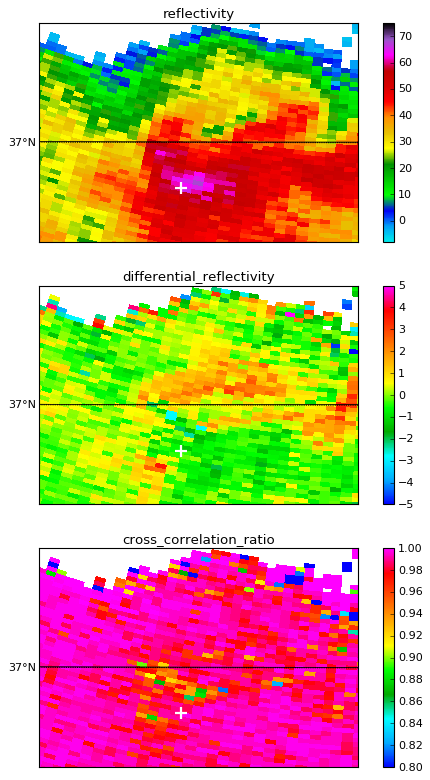

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
plot_base_scan(radar0, 0, 'reflectivity', axes[0], 
               title='field', cbar=True, vmin=-8, vmax=75)
plot_base_scan(radar0, 0, 'differential_reflectivity', axes[1], 
               title='field', cbar=True, vmin=-5, vmax=5)
plot_base_scan(radar0, 0, 'cross_correlation_ratio', axes[2], 
               title='field', cbar=True, vmin=0.8, vmax=1)
plt.show()

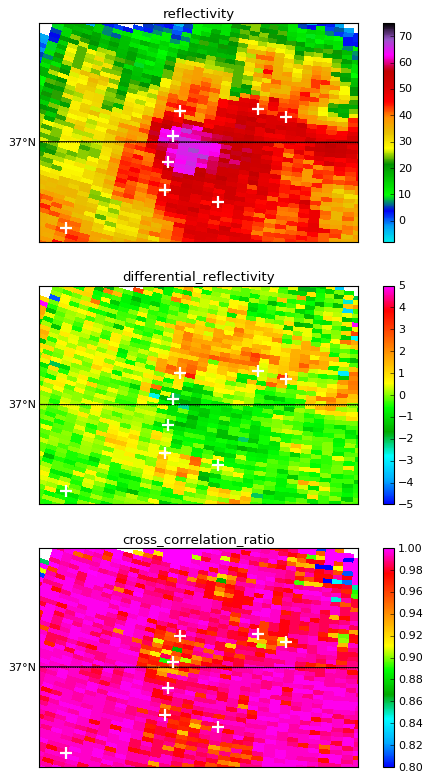

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
extents = dict(min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon)
plot_base_scan(radar0, 8, 'reflectivity', axes[0], 
               title='field', cbar=True, vmin=-8, vmax=75)
plot_base_scan(radar0, 8, 'differential_reflectivity', axes[1], 
               title='field', cbar=True, vmin=-5, vmax=5)
plot_base_scan(radar0, 8, 'cross_correlation_ratio', axes[2], 
               title='field', cbar=True, vmin=0.8, vmax=1)
plt.show()

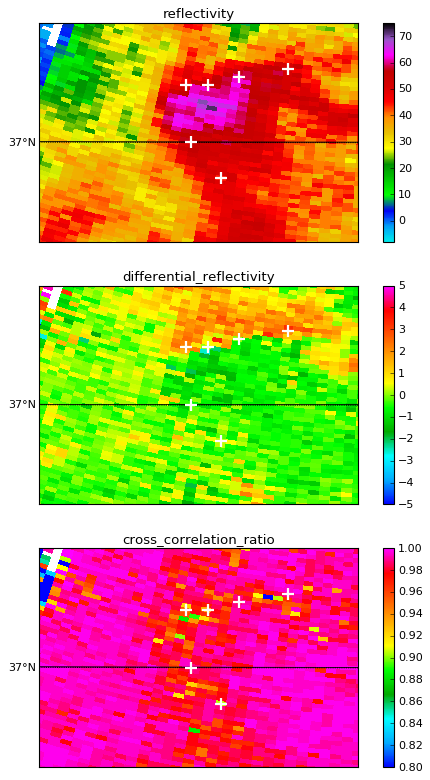

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
plot_base_scan(radar1, 0, 'reflectivity', axes[0], 
               title='field', cbar=True, vmin=-8, vmax=75)
plot_base_scan(radar1, 0, 'differential_reflectivity', axes[1], 
               title='field', cbar=True, vmin=-5, vmax=5)
plot_base_scan(radar1, 0, 'cross_correlation_ratio', axes[2], 
               title='field', cbar=True, vmin=0.8, vmax=1)
plt.show()

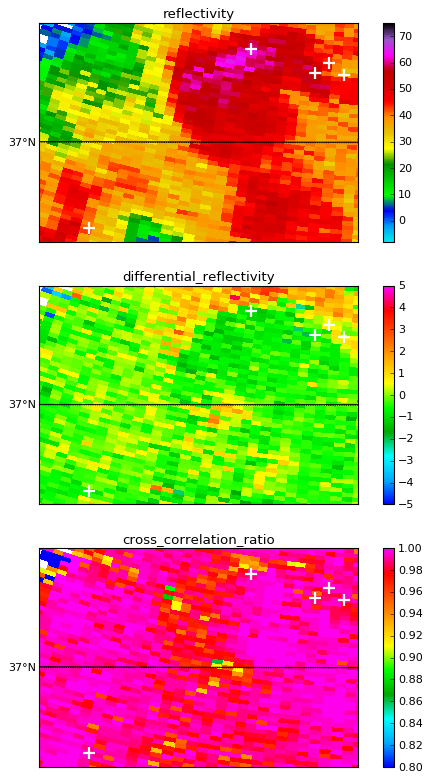

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
plot_base_scan(radar1, 8, 'reflectivity', axes[0], 
               title='field', cbar=True, vmin=-8, vmax=75)
plot_base_scan(radar1, 8, 'differential_reflectivity', axes[1], 
               title='field', cbar=True, vmin=-5, vmax=5)
plot_base_scan(radar1, 8, 'cross_correlation_ratio', axes[2], 
               title='field', cbar=True, vmin=0.8, vmax=1)
plt.show()